In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install healpy
!pip install git+https://github.com/vafaei-ar/ccgpack.git

     |████████████████████████████████| 23.6 MB 1.3 MB/s 
  Cloning https://github.com/vafaei-ar/ccgpack.git to /tmp/pip-req-build-sqrf290m
  Running command git clone -q https://github.com/vafaei-ar/ccgpack.git /tmp/pip-req-build-sqrf290m
  Created wheel for ccgpack: filename=ccgpack-0.1.0-cp37-cp37m-linux_x86_64.whl size=912836 sha256=e5f1dadcb9e4a61e6ae70397d05c688b7ee09d8b0c06b6513e2229097406e98b
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhqvg42c/wheels/12/6f/95/7ae57565d174cea0e92a0da0a36f289e045f46ef2173da656b
Successfully built ccgpack


In [ ]:
import numpy as np
import healpy as hp
import pylab as plt
import ccgpack as ccg

In [ ]:
map = '/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_1.fits'
string_map = hp.read_map(map,nest=1,verbose=0)

In [ ]:
gauss = "/content/drive/MyDrive/CMB/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"
gaussian_map = hp.read_map(gauss,nest=1,verbose=0)

In [ ]:
g_mu = 1e-6
cmb_with_string = gaussian_map + (g_mu * string_map)




# Power Spectrum------------------------------------------------------------------------

In [ ]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

In [100]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [160]:
lmax = 40

In [161]:
g_new = hp.anafast(gaussian_map, lmax=lmax, use_pixel_weights=True)

In [162]:
s_new = new = hp.anafast(string_map, lmax=lmax, use_pixel_weights=True)

In [163]:
CMB_new = new = hp.anafast(cmb_with_string, lmax=lmax, use_pixel_weights=True)

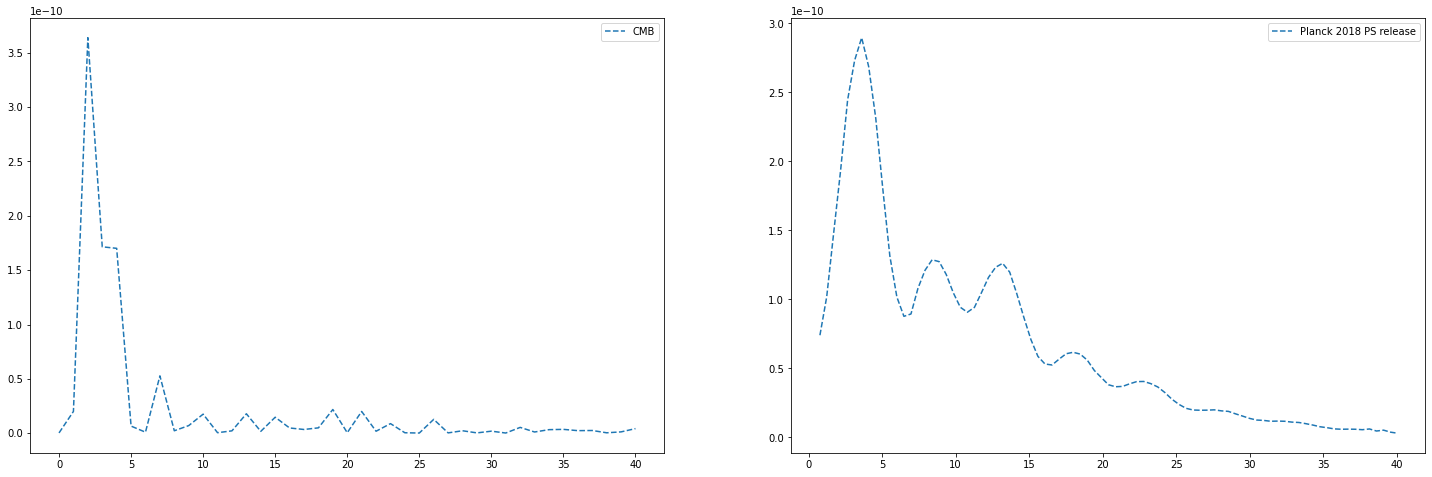

In [164]:
plt.figure(figsize = (25, 8))
"""
plt.subplot(1, 4, 1)
plt.plot(g_new, "--", label = "Gaussian")
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(s_new, "--", label = "String")
plt.legend()
"""
plt.subplot(1, 2, 1)
plt.plot(CMB_new,"--", label = "CMB")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cmb_binned_spectrum[:,0]/62.5, cmb_binned_spectrum[:,1]*0.5*1e-13, '--', label='Planck 2018 PS release')
plt.legend()

plt.show()

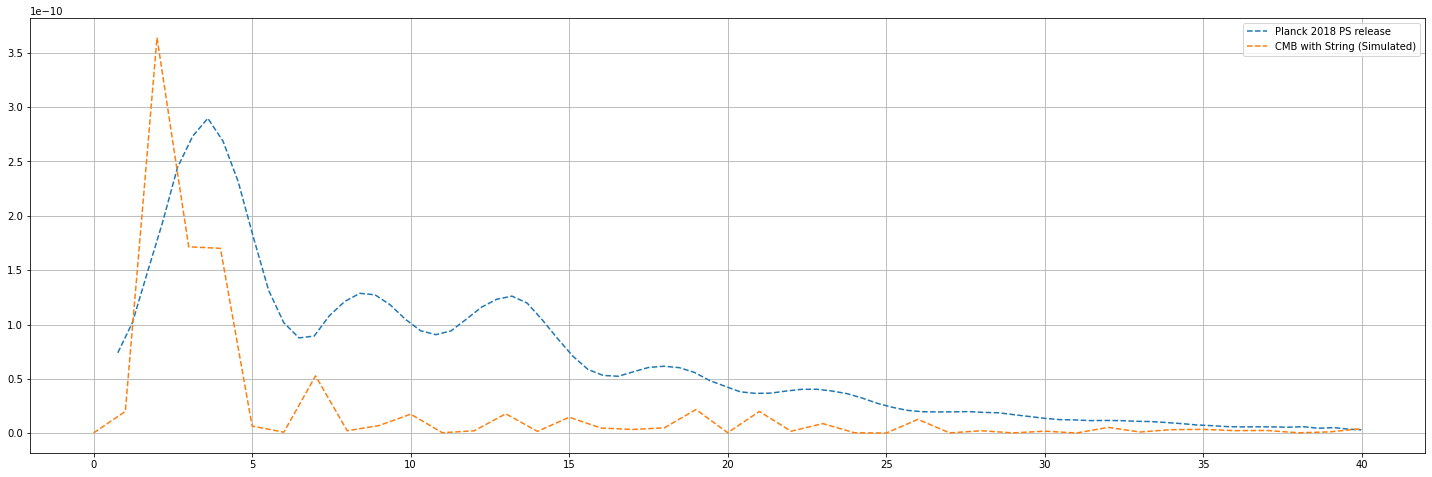

In [165]:
plt.figure(figsize = (25, 8))
plt.plot(cmb_binned_spectrum[:,0]/62.5, cmb_binned_spectrum[:,1]*0.5*1e-13, '--', label='Planck 2018 PS release')
plt.plot(CMB_new,"--", label = "CMB with String (Simulated)")
plt.legend()
plt.grid()
plt.show()